##1. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Training using CNN

CNN Training

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 256)       7168      
                                                                 
 activation_9 (Activation)   (None, 98, 98, 256)       0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 128)       295040    
                                                                 
 activation_10 (Activation)  (None, 47, 47, 128)       0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                 

<ipython-input-5-d51b184d13a1>:57: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
265/265 [==============================] - 483s 2s/step - loss: 0.6918 - accuracy: 0.6709 - val_loss: 0.6238 - val_accuracy: 0.6935
Epoch 2/50
265/265 [==============================] - 27s 102ms/step - loss: 0.5116 - accuracy: 0.7757 - val_loss: 0.7948 - val_accuracy: 0.6657
Epoch 3/50
265/265 [==============================] - 28s 105ms/step - loss: 0.4227 - accuracy: 0.8174 - val_loss: 0.6669 - val_accuracy: 0.7321
Epoch 4/50
265/265 [==============================] - 26s 98ms/step - loss: 0.3920 - accuracy: 0.8379 - val_loss: 0.8172 - val_accuracy: 0.6845
Epoch 5/50
265/265 [==============================] - 26s 99ms/step - loss: 0.3520 - accuracy: 0.8530 - val_loss: 0.5443 - val_accuracy: 0.7490
Epoch 6/50
265/265 [==============================] - 27s 101ms/step - loss: 0.3277 - accuracy: 0.8679 - val_loss: 0.6925 - val_accuracy: 0.7351
Epoch 7/50
265/265 [==============================] - 27s 104ms/step - loss: 0.3044 - accuracy: 0.8745 - val_loss: 0.3880 - val_accura

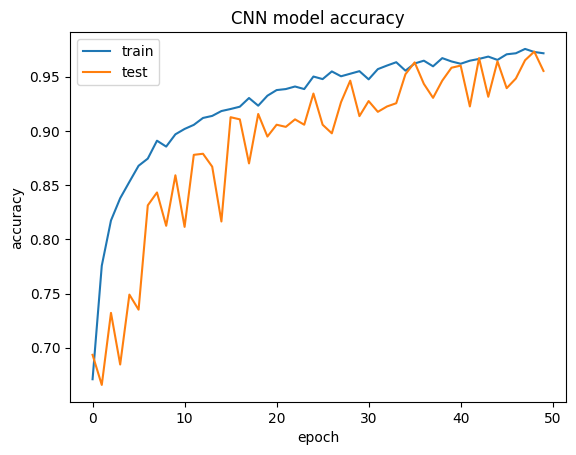

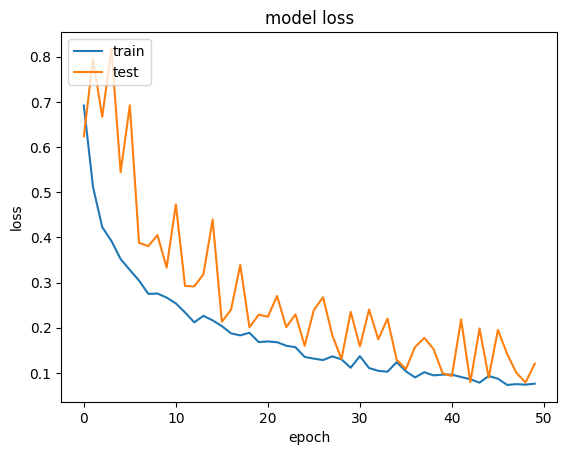

2073.8416435718536


In [5]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras
start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_2/Train'
validation_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_2/Test'
nb_train_samples = 4255
nb_validation_samples = 1011
epochs =50
batch_size = 16

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical', shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_cnn.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_CNN')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


Evaluation

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma','meningioma','notumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-6-b13177245ef6>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[281  15   4]
 [ 11 281  14]
 [  0   1 404]]
Classification Report
              precision    recall  f1-score   support

      glioma       0.96      0.94      0.95       300
  meningioma       0.95      0.92      0.93       306
     notumor       0.96      1.00      0.98       405

    accuracy                           0.96      1011
   macro avg       0.96      0.95      0.95      1011
weighted avg       0.96      0.96      0.96      1011



CONFUSION **MATRIX**

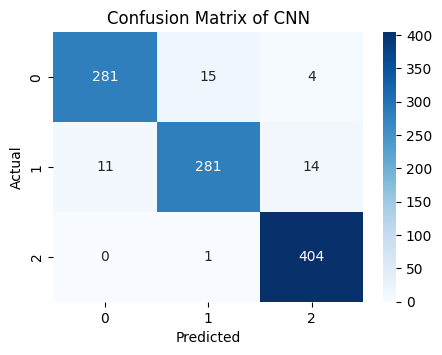

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_CNN.png')

# Show the plot
plt.show()

##3.Xception

Xception Training


83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 22041387 (84.08 MB)
Trainable params: 21986859 (83.87 MB)
Non-trainable params: 54528 (213.00 KB)
_________

<ipython-input-8-ea7ed5339c3c>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


265/265 [==============================] - 60s 122ms/step - loss: 0.6623 - accuracy: 0.7056 - val_loss: 1.5341 - val_accuracy: 0.7034
Epoch 2/50
265/265 [==============================] - 31s 115ms/step - loss: 0.3615 - accuracy: 0.8891 - val_loss: 0.5949 - val_accuracy: 0.7778
Epoch 3/50
265/265 [==============================] - 31s 118ms/step - loss: 0.2140 - accuracy: 0.9288 - val_loss: 0.2496 - val_accuracy: 0.9335
Epoch 4/50
265/265 [==============================] - 31s 115ms/step - loss: 0.1931 - accuracy: 0.9406 - val_loss: 1.5273 - val_accuracy: 0.8363
Epoch 5/50
265/265 [==============================] - 31s 118ms/step - loss: 0.1527 - accuracy: 0.9580 - val_loss: 0.1527 - val_accuracy: 0.9444
Epoch 6/50
265/265 [==============================] - 32s 119ms/step - loss: 0.1167 - accuracy: 0.9639 - val_loss: 1.3810 - val_accuracy: 0.7877
Epoch 7/50
265/265 [==============================] - 32s 120ms/step - loss: 0.1223 - accuracy: 0.9625 - val_loss: 1.1013 - val_accuracy: 0.7

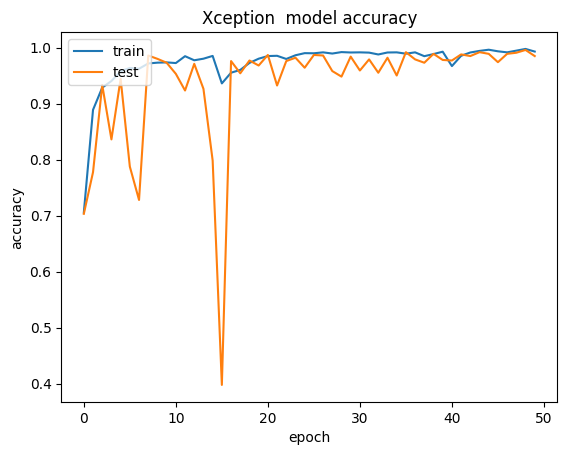

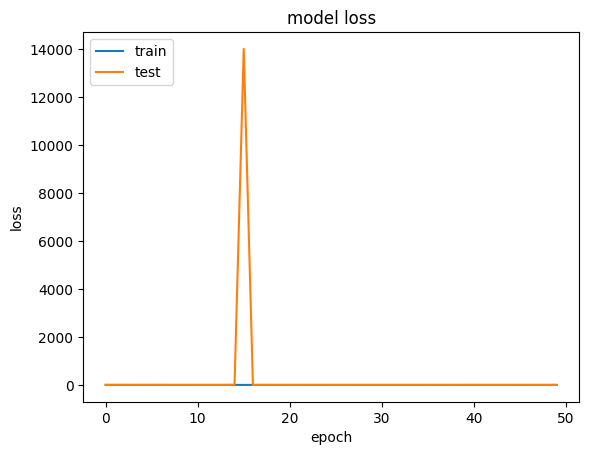

1779.8329193592072


In [8]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import Xception
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf

start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_2/Train'
validation_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_2/Test'
nb_train_samples = 4255
nb_validation_samples = 1011
epochs = 50
batch_size = 16

input_shape = (img_width, img_height, 3)

# Use Xception as the base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_xcpetion.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception  model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


Evaluation

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma','meningioma','notumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-9-b13177245ef6>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[287  13   0]
 [  0 306   0]
 [  0   2 403]]
Classification Report
              precision    recall  f1-score   support

      glioma       1.00      0.96      0.98       300
  meningioma       0.95      1.00      0.98       306
     notumor       1.00      1.00      1.00       405

    accuracy                           0.99      1011
   macro avg       0.98      0.98      0.98      1011
weighted avg       0.99      0.99      0.99      1011



CONFUSION MATRIX

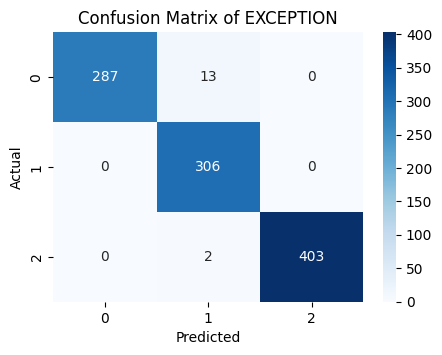

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of EXCEPTION')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_EXCEPTION.png')

# Show the plot
plt.show()

#4. Inception

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 21934115 (83.67 MB)
Trainable params: 21899683 (83.54 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________
Found 42

<ipython-input-2-68bad608ff38>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
132/132 [==============================] - 71s 269ms/step - loss: 0.6278 - accuracy: 0.7331 - val_loss: 0.4778 - val_accuracy: 0.8135
Epoch 2/50
132/132 [==============================] - 30s 225ms/step - loss: 0.2810 - accuracy: 0.8913 - val_loss: 0.2517 - val_accuracy: 0.9173
Epoch 3/50
132/132 [==============================] - 28s 214ms/step - loss: 0.1969 - accuracy: 0.9294 - val_loss: 0.1628 - val_accuracy: 0.9476
Epoch 4/50
132/132 [==============================] - 29s 221ms/step - loss: 0.1412 - accuracy: 0.9472 - val_loss: 0.1568 - val_accuracy: 0.9435
Epoch 5/50
132/132 [==============================] - 29s 221ms/step - loss: 0.1233 - accuracy: 0.9590 - val_loss: 0.0638 - val_accuracy: 0.9728
Epoch 6/50
132/132 [==============================] - 29s 221ms/step - loss: 0.0851 - accuracy: 0.9690 - val_loss: 0.0728 - val_accuracy: 0.9758
Epoch 7/50
132/132 [==============================] - 29s 216ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0561 - val_ac

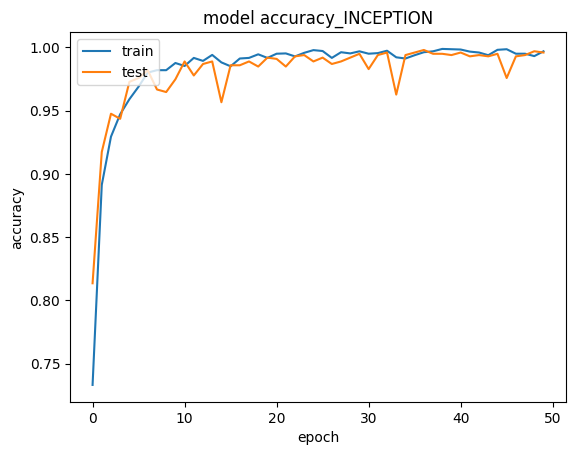

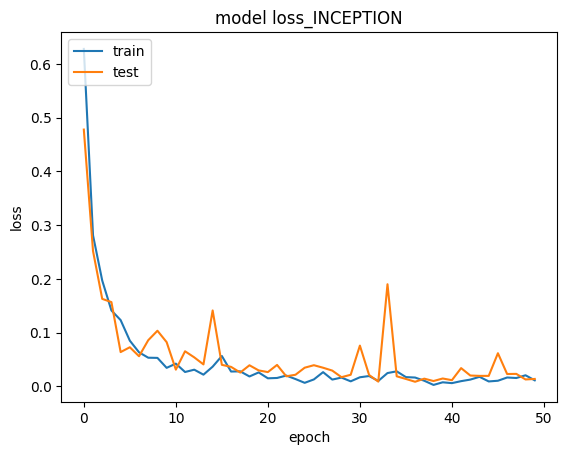

1724.5834512710571


In [2]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import InceptionV3
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf
import keras

start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_2/Train'
validation_data_dir = '/content/drive/MyDrive/Bhakti Gawali/Dataset_2/Test'
nb_train_samples = 4255
nb_validation_samples = 1011
epochs = 50
batch_size = 32

input_shape = (img_width, img_height, 3)

# Using InceptionV3 as base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_INCEPTION.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy_INCEPTION')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_INCEPTION')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


#Evaluation

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma','meningioma','notumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-3-b13177245ef6>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[296   4   0]
 [  0 306   0]
 [  0   0 405]]
Classification Report
              precision    recall  f1-score   support

      glioma       1.00      0.99      0.99       300
  meningioma       0.99      1.00      0.99       306
     notumor       1.00      1.00      1.00       405

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011



confusion matrix


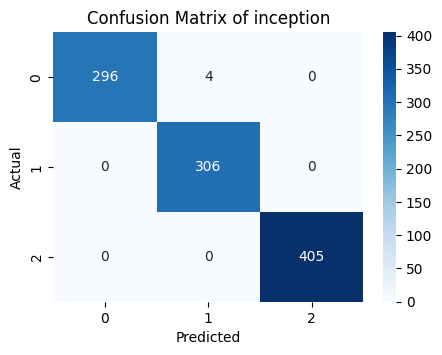

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of inception')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_inception.png')

# Show the plot
plt.show()